In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.families import Binomial

plt.rcParams['font.sans-serif'] = 'Arial'


In [ ]:
ff_tag = ['炸鸡/鸡排/炸串', '西式快餐', '快餐简餐']
all_months = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805']

actuals = pd.read_csv('regression_table_thres20.csv')
gh_access = pd.read_csv('geohash6_with_third_tag_name_point_count.csv')
gh_access['location_ff'] = gh_access[ff_tag].sum(axis = 1)
gh_access['location_total'] = gh_access[[x for x in gh_access.columns if x not in ['geohash6', 'latitude', 'longitude', 'geometry', 'city_name']]].sum(axis = 1)
gh_access['location_access_ff'] = gh_access['location_ff'] / gh_access['location_total']
actuals = pd.merge(actuals, gh_access[['geohash6', 'location_access_ff']], on = 'geohash6')

user_data = pd.read_csv('user_demog.csv')

merged_data = pd.merge(actuals, user_data[['userid', 'gender_label', 'age', 'salary']], left_on='user_code', right_on='userid', how='inner')

In [5]:

def fit_glm_model_with_month2(df, header):
    month_dummies = pd.get_dummies(df['month'], prefix='month')
    month_dummies = month_dummies.drop(columns = 'month_201801')
    X = df[['user_pref_ff', 'location_access_ff']].values
    X = np.hstack([X, month_dummies.values])

    X_expanded = np.vstack([X, X])
    y_expanded = np.hstack([np.ones(len(df)), np.zeros(len(df))])
    weights_expanded = np.hstack([df['actual_ff'], df['actual_nff']])

    X_train = sm.add_constant(X_expanded)
    model_glm = sm.GLM(y_expanded, X_train, family=Binomial(), freq_weights=weights_expanded)
    result_glm = model_glm.fit()

    print(f'Model for {header}:')
    conf = result_glm.conf_int()
    print(conf)
    print(result_glm.summary()) 
    
    return result_glm.conf_int()[1:3, :]

In [6]:
labs = []
x0l = []
x0h = []
x1l = []
x1h = []

result_glm = fit_glm_model_with_month2(merged_data, 'all')
labs.append('All')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.gender_label == 'Female'], 'all')
labs.append('Female')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.gender_label == 'Male'], 'all')
labs.append('Male')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.salary == 0], 'low salary')
labs.append('Low Income')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.salary == 1], 'medium salary')
labs.append('Medium Income')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.salary == 2], 'high salary')
labs.append('High Income')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.age.isin([0, 1])], '<25 yr')
labs.append('<25 yr')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.age.isin([2, 3, 4])], '25~40 yr')
labs.append('25~40 yr')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

result_glm = fit_glm_model_with_month2(merged_data[merged_data.age == 5], '>40 yr')
labs.append('>40 yr')
x0l.append(result_glm[0][0])
x0h.append(result_glm[0][1])
x1l.append(result_glm[1][0])
x1h.append(result_glm[1][1])

Model for all:
[[-2.21486671e+00 -2.17547735e+00]
 [ 3.21486630e+00  3.23999796e+00]
 [ 1.89176269e+00  2.08123694e+00]
 [-7.74120605e-02 -6.20214603e-02]
 [-9.89352200e-03  3.36321878e-03]
 [-2.86324603e-02 -1.56186335e-02]
 [-3.70664331e-04  1.21245900e-02]]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               974612
Model:                            GLM   Df Residuals:                  3860179
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4487e+06
Date:                Wed, 18 Jun 2025   Deviance:                   4.8974e+06
Time:                        17:00:42   Pearson chi2:                 3.86e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2518
Covariance Type:            

In [7]:
df_lr = pd.DataFrame({'Class': labs, 'User_l': x0l, 'User_h': x0h, 'Env_l': x1l, 'Env_h': x1h})

df_lr['User'] = (df_lr['User_l'] + df_lr['User_h']) / 2
df_lr['Env'] = (df_lr['Env_l'] + df_lr['Env_h']) / 2

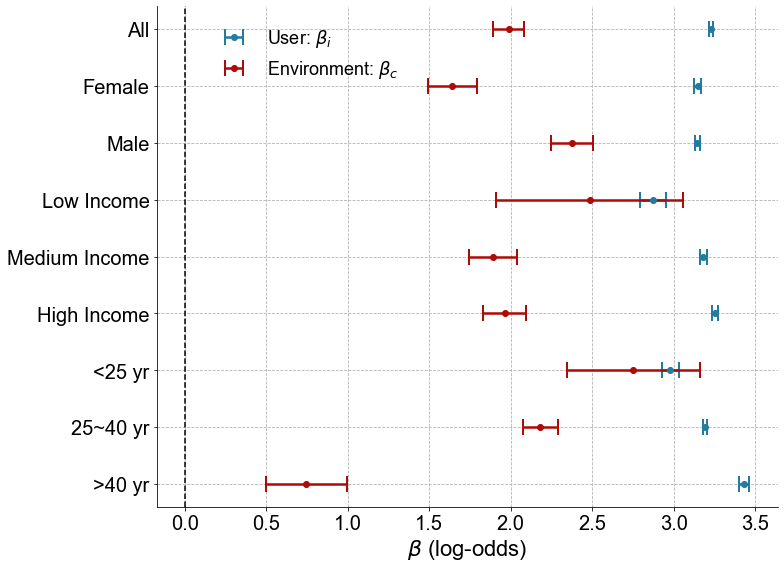

In [8]:
fig, ax = plt.subplots(figsize=(11, 8))
dotCOLS = ["#a6d8f0", "#f9b282"]
dotCOLS = ['#71BFB2', '#237B9F', '#EC817E', '#AD0B08']
plt.errorbar(df_lr['User'], df_lr['Class'], xerr=[df_lr['User'] - df_lr['User_l'], df_lr['User_h'] - df_lr['User']], 
             fmt='o', label= r'User: $\beta_i$', color=dotCOLS[1], ecolor=dotCOLS[1], capsize=8, lw = 2.5, capthick = 2)
plt.errorbar(df_lr['Env'], df_lr['Class'], xerr=[df_lr['Env'] - df_lr['Env_l'], df_lr['Env_h'] - df_lr['Env']], 
             fmt='o', label= r'Environment: $\beta_c$', color=dotCOLS[3], ecolor=dotCOLS[3], capsize=8, lw = 2.5, capthick = 2)
plt.axvline(x=0, color='black', linestyle='--')
# plt.ylabel('Group', size = 20)
plt.xlabel(r'$\beta$ (log-odds)', size = 22)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.invert_yaxis()
plt.grid(ls = '--')
plt.legend(frameon = False, fontsize = 18, bbox_to_anchor = (0.07, 0.99))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.show()